# <center><h3>Complex Network Project</h3></center>


In [32]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch
from scipy.interpolate import interp1d

# plt.style.use("ggplot")

# Pre-Processing


In [2]:
Base_Graph = nx.DiGraph()

department_labels = "email-Eu-core-department-labels.txt"
email = "email-Eu-core.txt"

department_labels_csv = pd.read_csv(department_labels, sep=",")
email_csv = pd.read_csv(email, sep=",")

email_csv.head()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [3]:
department_labels_csv.head()

,id,dep
0,0,1
1,1,1
2,2,21
3,3,21
4,4,21


In [4]:
dep_people = {}
# generate dictionary from department labels with keys as department and values as ids
for i in range(len(department_labels_csv)):
    if department_labels_csv["dep"][i] not in dep_people:
        dep_people[department_labels_csv["dep"][i]] = [department_labels_csv["id"][i]]
    else:
        dep_people[department_labels_csv["dep"][i]].append(
            department_labels_csv["id"][i]
        )
    # print(department_labels_csv['department'][i])
# print(dep_people)

In [5]:
i = 0
dep_color = []
for name in mcolors.CSS4_COLORS:
    i += 1
    if i == 43:
        break
    dep_color.append(name)

color_map = []
for i in range(len(department_labels_csv)):
    color_map.append(dep_color[department_labels_csv["dep"][i]])

# print((len(color_map)))
# print(color_map[0])

In [6]:
# Base_Graph.add_nodes_from()
Base_Graph.add_edges_from(email_csv.to_numpy())

In [7]:
def draw_graph_with_community_color(Graph, department_labels_csv, color_map):
    """
    Function to draw the Base_graph with nodes having color based on community given in email-Eu-core-department-labels.txt
    and size of a node as degree of node and separate the community based on the color.
    """
    # Create a dictionary with keys as department and values as ids
    Base_Graph = Graph.copy()
    Base_Graph.remove_edges_from(nx.selfloop_edges(Base_Graph))
    dep_people = {}
    for i in range(len(department_labels_csv)):
        if department_labels_csv["dep"][i] not in dep_people:
            dep_people[department_labels_csv["dep"][i]] = [
                department_labels_csv["id"][i]
            ]
        else:
            dep_people[department_labels_csv["dep"][i]].append(
                department_labels_csv["id"][i]
            )

    # Create a list of node sizes based on degree of node
    node_sizes = {}
    for i in range(len(department_labels_csv)):
        if department_labels_csv["id"][i] not in node_sizes:
            node_sizes[department_labels_csv["id"][i]] = [
                Base_Graph.degree(department_labels_csv["id"][i])
            ]
        else:
            node_sizes[department_labels_csv["id"][i]].append(
                Base_Graph.degree(department_labels_csv["id"][i])
            )

    # Draw the graph with nodes having color based on community and size based on degree of node
    fig, ax = plt.subplots(figsize=(20, 15))
    pos = nx.kamada_kawai_layout(Base_Graph)
    for i, com in enumerate(dep_people.values()):
        subgraph = Base_Graph.subgraph(com)
        subpos = {k: pos[k] for k in com}
        nx.draw_networkx_nodes(
            subgraph,
            subpos,
            node_color=color_map[i],
            node_size=node_sizes[i],
            alpha=0.9,
            ax=ax,
        )
        # Add minimum distance between two communities
        pos = nx.spring_layout(Base_Graph, pos=subpos, fixed=com, k=2, seed=42)
    nx.draw_networkx_edges(Base_Graph, pos, alpha=0.5, ax=ax)
    plt.show()

In [8]:
# draw_graph_with_community_color(Base_Graph, department_labels_csv, color_map)

In [9]:
# # nx.draw(Base_Graph, node_color=color_map)
# nx.draw(Base_Graph, pos=nx.spring_layout(Base_Graph))
# # nx.draw(Base_Graph, pos=nx.kamada_kawai_layout(Base_Graph))
# plt.show()

In [10]:
# nx.number_connected_components(Base_Graph.to_undirected())

In [11]:
Subsest_Base_Graph = nx.DiGraph()

email_short = "email-Eu-core.txt"

email_short_csv = pd.read_csv(email_short, sep=",")

email_short_csv.head()

# Base_Graph.add_nodes_from()
# Subsest_Base_Graph.add_edges_from(email_short_csv.to_numpy())
# nx.draw(Subsest_Base_Graph, node_color=color_map)
# plt.show()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [12]:
undirected_Base_Graph = nx.Graph()

undirected_Base_Graph.add_edges_from(email_csv.to_numpy())
undirected_Base_Graph.remove_edges_from(
    nx.selfloop_edges(undirected_Base_Graph))
undirected_Base_Graph.remove_nodes_from(
    list(nx.isolates(undirected_Base_Graph)))
# nx.draw(undirected_Base_Graph)
# plt.show()

# Degree Distribution


In [112]:
def ApproximatePowerLow(x, y):
    """function to approximate power law"""

    from sklearn.linear_model import LinearRegression

    log_X = np.log(x.reshape(-1, 1))
    log_y = np.log(y)

    # Fit linear regression model on the transformed data
    model = LinearRegression()
    model.fit(log_X, log_y)
    # Extract the coefficients from the model
    alpha_pred = model.coef_[0]
    c_pred = np.exp(model.intercept_)

    new_x = np.linspace(x.min(), x.max() + 50, 1000)
    new_y = c_pred * (new_x ** (alpha_pred))
    return new_x, new_y, alpha_pred, c_pred

1 - alpha =  -1.8947470783584204
alpha =  2.8947470783584204


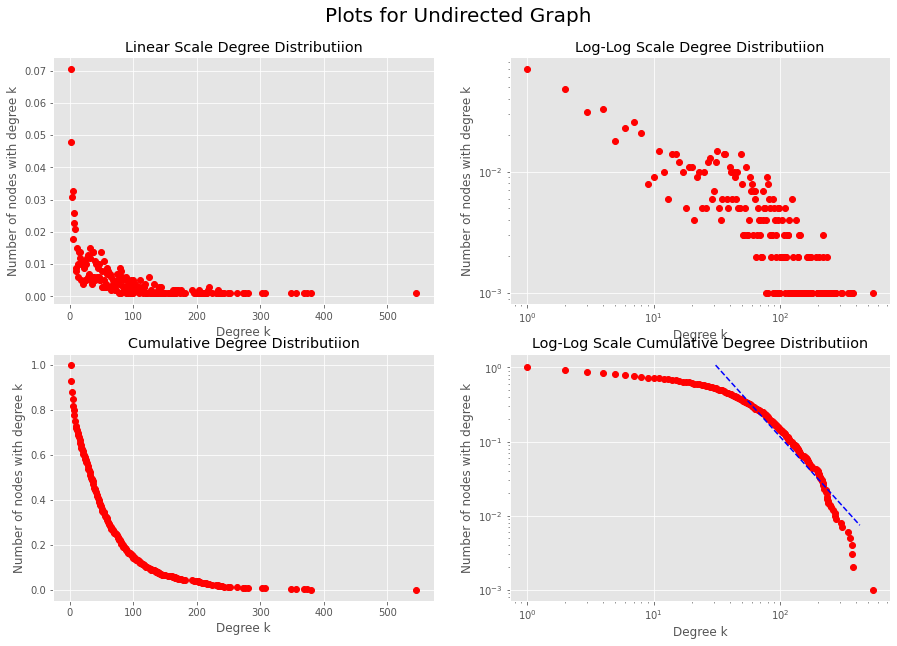

In [114]:
degree = np.array(Base_Graph.degree)[:, 1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)
counts_elements = counts_elements / np.sum(counts_elements)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Plots for Undirected Graph", y=0.95, fontsize=20)
ax[0, 0].plot(unique_elements, counts_elements, "ro")
ax[0, 0].set_title("Linear Scale Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, "ro")
ax[0, 1].set_title("Log-Log Scale Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

cumulative = np.cumsum(counts_elements[::-1])[::-1]
x, y, alpha, c = ApproximatePowerLow(unique_elements[30:-1], cumulative[30:-1])
print("1 - alpha = ", alpha)
print("alpha = ", 1 - alpha)

ax[1, 0].plot(unique_elements, cumulative, "ro")
# ax[1, 0].plot(x, y, "b--")
ax[1, 0].set_title("Cumulative Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")

ax[1, 1].loglog(unique_elements, cumulative, "ro")
ax[1, 1].loglog(x, y, "b--")
ax[1, 1].set_title("Log-Log Scale Cumulative Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

plt.show()

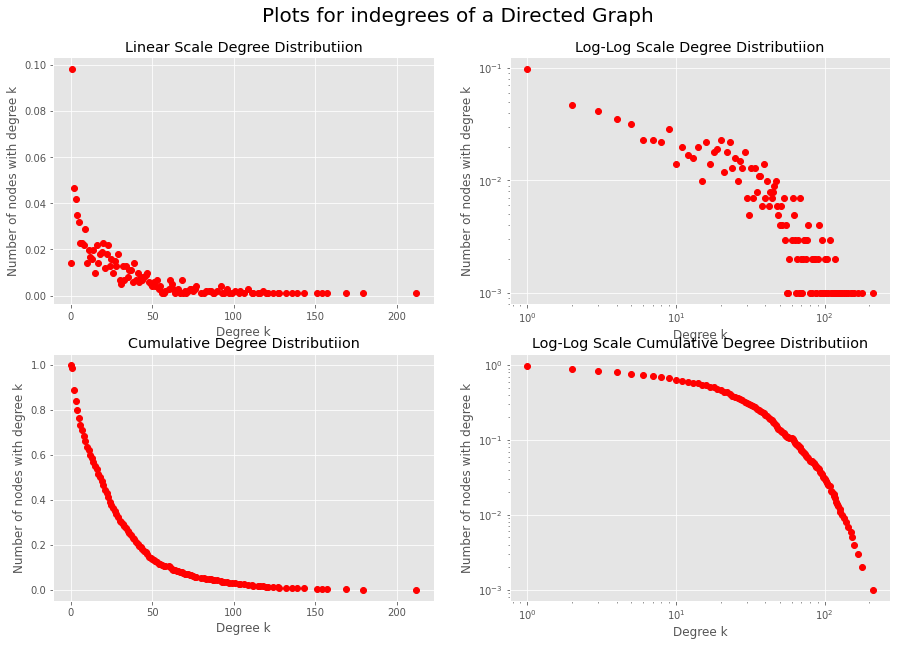

In [59]:
degree = np.array(Base_Graph.in_degree)[:, 1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)
counts_elements = counts_elements / np.sum(counts_elements)


fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Plots for indegrees of a Directed Graph", y=0.95, fontsize=20)
ax[0, 0].plot(unique_elements, counts_elements, "ro")
ax[0, 0].set_title("Linear Scale Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, "ro")
ax[0, 1].set_title("Log-Log Scale Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

cumulative = np.cumsum(counts_elements[::-1])[::-1]
ax[1, 0].plot(unique_elements, cumulative, "ro")
ax[1, 0].set_title("Cumulative Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")

ax[1, 1].loglog(unique_elements, cumulative, "ro")
ax[1, 1].set_title("Log-Log Scale Cumulative Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

plt.show()

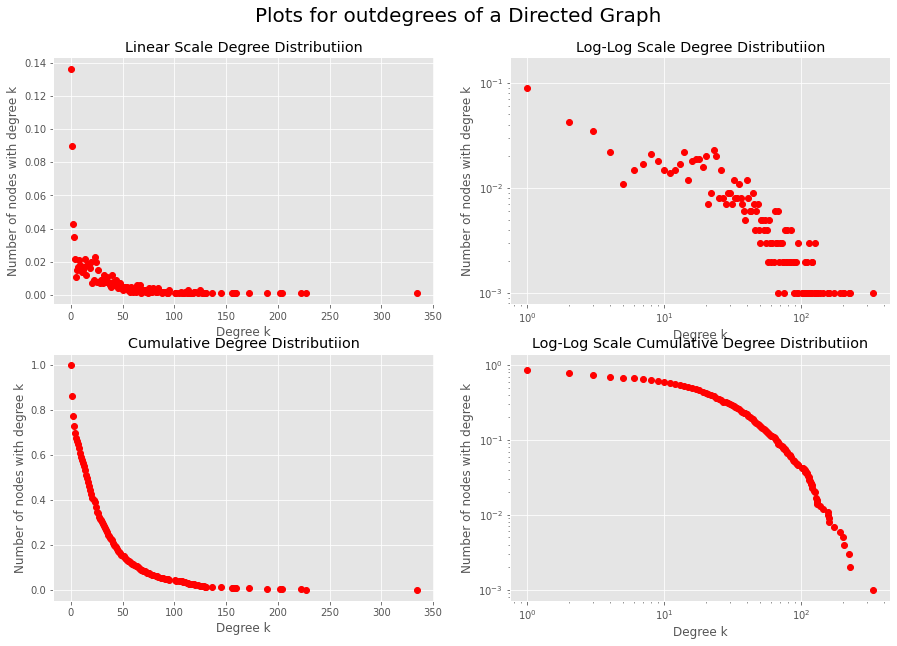

In [60]:
degree = np.array(Base_Graph.out_degree)[:, 1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)
counts_elements = counts_elements / np.sum(counts_elements)


fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Plots for outdegrees of a Directed Graph", y=0.95, fontsize=20)
ax[0, 0].plot(unique_elements, counts_elements, "ro")
ax[0, 0].set_title("Linear Scale Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, "ro")
ax[0, 1].set_title("Log-Log Scale Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

cumulative = np.cumsum(counts_elements[::-1])[::-1]
ax[1, 0].plot(unique_elements, cumulative, "ro")
ax[1, 0].set_title("Cumulative Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")

ax[1, 1].loglog(unique_elements, cumulative, "ro")
ax[1, 1].set_title("Log-Log Scale Cumulative Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

plt.show()

# Louvain Algorithn


In [61]:
louvian_G = Base_Graph.copy()
louvian_G.remove_edges_from(nx.selfloop_edges(louvian_G))
# louvian_G.remove_nodes_from(list(nx.isolates(louvian_G)))
# nx.draw(louvian_G, with_labels=True, font_weight='bold')

In [62]:
def louvain_self(
    oldgraph, num_iter, threshold=1e-7, all_res=np.array([0, 0.01, 0.05, 0.5])
):
    """Function to run Louvain community detection algorithm on a graph"""

    num_comm = 0
    all_communities = []
    # Run Louvain algorithm for num_iter times and take the average number of communities
    for i in range(0, num_iter):
        G1 = oldgraph.copy()
        res = all_res[np.random.randint(0, len(all_res))]
        louvian_communites = np.array(
            nx.community.louvain_communities(
                G1, resolution=res, threshold=threshold, seed=i
            )
        )
        num_comm += louvian_communites.shape[0]
        all_communities.append(louvian_communites)
    avg_communities = num_comm / num_iter

    return avg_communities, all_communities

In [63]:
# louvian_G_avg_comm, louvian_G_all_comm = louvain_self(louvian_G, 100, threshold=1e-15, all_res = np.array([0, 0.01, 0.05, 0.5]))
louvian_G_avg_comm, louvian_G_all_comm = louvain_self(
    louvian_G, 1000, threshold=1e-2, all_res=np.array([0.13, 0.15, 0.17]) * 8
)
print(louvian_G_avg_comm)

40.035


In [64]:
louvain_community_size = np.array([])
for i in range(len(louvian_G_all_comm)):
    louvain_community_size = np.append(
        louvain_community_size, len(louvian_G_all_comm[i])
    )

# print(np.where(louvain_community_size == 42)[0])

In [65]:
# louvain_index = np.where(louvain_community_size == 42)[0][0]
# louvian_G_all_comm[louvain_index] = sorted(louvian_G_all_comm[louvain_index])
# print(len(louvian_G_all_comm[louvain_index]))
# for i in range(len(louvian_G_all_comm[louvain_index])):
#     print(louvian_G_all_comm[louvain_index][i])
#     # print("")

In [66]:
# louvain_index = np.where(louvain_community_size == 42)[0][-1]
# louvian_G_all_comm[louvain_index] = sorted(louvian_G_all_comm[louvain_index])
# print(len(louvian_G_all_comm[louvain_index]))
# for i in range(len(louvian_G_all_comm[louvain_index])):
#     print(louvian_G_all_comm[louvain_index][i])
#     # print("")

In [67]:
actual_com_List = []
for key, value in dep_people.items():
    print(value)
    actual_com_List.append(value)

[0, 1, 17, 18, 73, 74, 85, 120, 177, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 248, 297, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 341, 414, 415, 449, 459, 468, 479, 516, 517, 603, 605, 629, 645, 650, 675, 696, 697, 731, 734, 743, 764, 775, 797, 798, 846, 852, 872, 904, 905, 916, 1002]
[2, 3, 4, 56, 57, 58, 59, 63, 137, 138, 192, 193, 194, 195, 281, 286, 305, 408, 412, 456, 520, 532, 571, 586, 587, 606, 622, 625, 633, 634, 635, 636, 648, 670, 685, 691, 711, 718, 755, 762, 774, 803, 815, 826, 832, 845, 849, 863, 865, 880, 882, 884, 899, 901, 921, 928, 982, 990, 993, 994, 1001]
[5, 6, 64, 489, 528, 644]
[7, 8, 9, 11, 12, 19, 43, 44, 141, 161, 213, 246, 247, 249, 264, 265, 266, 267, 293, 324, 332, 358, 359, 360, 362, 365, 374, 406, 407, 421, 430, 441, 451, 452, 466, 487, 488, 496, 498, 499, 500, 501, 502, 503, 504, 505, 506, 510, 525, 529, 530, 555, 558, 565, 566, 569, 570, 573, 602, 608, 649, 658, 661, 666, 672, 674, 699, 700, 707, 720, 729, 739, 754, 765, 

# Community Matching based on Similarity


In [68]:
def similarity_score_bet_twoComm(com1, com2, nodes=1005):
    """Function to calculate similarity score between two communities"""
    score = 0.0
    map1 = np.zeros(nodes)
    map2 = np.zeros(nodes)

    # Create a map with keys as nodes and values as 1 if node is present in community else 0
    for x in com1:
        map1[x] = 1
    for x in com2:
        map2[x] = 1

    score = np.sum(map1 * map2)

    return (score * score) / (len(com1) * len(com2))

In [69]:
def accuracy_of_community_detection(list_com1, list_com2, nodes=1005, threshold=0.3):
    """Function to calculate accuracy of community detection between two lists of communities"""
    new_list1 = []
    new_list2 = list_com2.copy()

    # Remove communities with size less than threshold percentage of total nodes
    for x in list_com1:
        if len(x) > int(threshold * nodes / 100):
            new_list1.append(x)

    size1 = len(new_list1)

    score = 0.0

    # Calculate similarity score between two communities and remove the community with maximum similarity score
    for x in new_list1:
        max_score = 0.0
        max_index = -1
        i = 0
        if len(new_list2) == 0:
            break
        for y in new_list2:
            s = similarity_score_bet_twoComm(x, y, nodes)
            # print(s)
            if s > max_score:
                max_score = s
                max_index = i
            i += 1
        del new_list2[max_index]

        # Add the maximum similarity score to the total score
        score += max_score

    # Return the average similarity score
    return score / size1

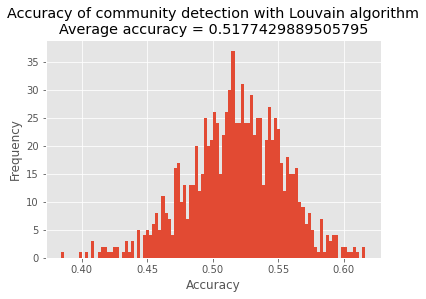

In [70]:
def accuracy_of_community_detection_plot():
    accuracy = np.array([])
    for i in range(len(louvian_G_all_comm)):
        accuracy = np.append(
            accuracy,
            accuracy_of_community_detection(
                louvian_G_all_comm[i], actual_com_List, nodes=1005
            ),
        )
    # plot histogram of accuracy
    plt.hist(accuracy, bins=100)
    plt.xlabel("Accuracy")
    plt.ylabel("Frequency")
    plt.title(
        "Accuracy of community detection with Louvain algorithm"
        "\nAverage accuracy = " + str(np.mean(accuracy))
    )
    plt.show()


accuracy_of_community_detection_plot()

In [26]:
louvain_index = np.where(louvain_community_size == 42)[0][-1]
louvian_G_all_comm[louvain_index]
# actual_com_List
print(
    accuracy_of_community_detection(
        louvian_G_all_comm[louvain_index], actual_com_List, 1005, 0.3
    )
)

0.4825624786630348


In [71]:
max_score = 0.0
best_community = []
for x in louvian_G_all_comm:
    score = accuracy_of_community_detection(x, actual_com_List, 1005, 0.3)
    # print(score)
    if score > max_score:
        max_score = score
        best_community = x

print("The best score is: " + str(max_score))
print("The size of the best detected community is: " + str(len(best_community)))
# print("The best community is :")
# print(best_community)

The best score is: 0.6163614517636812
The size of the best detected community is: 40


In [72]:
max_score = 0.0
best_community = []
for x in louvian_G_all_comm:
    if len(x) == 42:
        score = accuracy_of_community_detection(x, actual_com_List, 1005, 0.3)
        # print(score)
        if score > max_score:
            max_score = score
            best_community = x

print("The best score is: " + str(max_score))
print("The size of the best detected community is: " + str(len(best_community)))
# print("The best community is :")
# print(best_community)

The best score is: 0.5941698449865269
The size of the best detected community is: 42


# Centralities


In [73]:
def degree_centrality(graph1):
    return nx.degree_centrality(graph1)

In [74]:
def closeness_centrality(graph1):
    return nx.closeness_centrality(graph1)

In [75]:
def betweenness_centrality(graph1):
    return nx.betweenness_centrality(graph1)

In [76]:
def eigenvector_centrality(graph1):
    return nx.eigenvector_centrality(graph1)

In [77]:
def hubs_and_authorities(graph1):
    return nx.hits(graph1)

In [78]:
def katz_centrality(graph1):
    return nx.katz_centrality(graph1, 0.1, 1, 100000)

In [79]:
def pagerank(graph1):
    return nx.pagerank(graph1)

In [116]:
# print("The Degree Centrality of base graph is: \n", degree_centrality(Base_Graph))
# print("The Closeness Centrality of base graph is: \n", closeness_centrality(Base_Graph))
# print(
#     "The Betweenness Centrality of base graph is: \n",
#     betweenness_centrality(Base_Graph),
# )
# print(
#     "The Eigenvector Centrality of base graph is: \n",
#     eigenvector_centrality(Base_Graph),
# )
# # print("The Katz Centrality of base graph is: \n", katz_centrality(Base_Graph))
# print("The hubs and authorities of base graph is: \n", hubs_and_authorities(Base_Graph))
# print("The page rank of the base graph is: \n", pagerank(Base_Graph))

In [133]:
def score_based_on_centralities(c1, c2, c3, c4, weight=[0.15, 0.15, 0.3, 0.4]):
    """function to calculate weighted score based on centralities"""
    map1 = {}
    # w1 closeness -> third highest -> 0.15
    # w2 betweenness -> third highest -> 0.15
    # w3 eigenvector -> second highest -> 0.3
    # w4 pagerank -> highest -> 0.4

    w1 = weight[0]
    w2 = weight[1]
    w3 = weight[2]
    w4 = weight[3]


    # i = 0
    for key in c1:
        # map1[i][1] = w1*c1[i][1] + w2*c2[i][1] + w3*c3[i][1] + w4*c4[i][1]
        # map1[i][1] = w1*c1[i] + w2*c2[i] + w3*c3[i] + w4*c4[i]
        # print(key)
        map1[key] = w1 * c1[key] + w2 * c2[key] + w3 * c3[key] + w4 * c4[key]

    return map1

In [134]:
# custom_score = score_based_on_centralities(closeness_centrality(Base_Graph), betweenness_centrality(Base_Graph), eigenvector_centrality(Base_Graph), pagerank(Base_Graph))
# print("The custom ranking is: \n", custom_score[custom_score[:,1].argsort()])

In [135]:
# def plot_comp_vs_CustomNodeRemoved(g1, nodes = 1005):
#     graph1 = g1.copy()
#     number_of_components = [[]]
#     number_of_components.append([-1, nx.number_connected_components(graph1)])
#     # while(graph1.number_of_nodes() > nodes - 100):
#     y = []
#     x = []
#     i = 0
#     y.append(nx.number_connected_components(graph1))
#     i += 1
#     x.append(i)
#     for _ in range(100):
#         print("Number of Nodes removed: ", nodes - graph1.number_of_nodes())
#         print("Number of Components: ", nx.number_connected_components(graph1))
#         map_score = score_based_on_centralities(closeness_centrality(graph1), betweenness_centrality(graph1), eigenvector_centrality(graph1), pagerank(graph1), graph1.number_of_nodes())
#         custom_score = np.array([[key, value] for key, value in map_score.items()])
#         # print(custom_score)
#         custom_score = custom_score[custom_score[:,1].argsort()]
#         node_to_remove = int(custom_score[-1][0])
#         graph1.remove_node(node_to_remove)
#         y.append(nx.number_connected_components(graph1))
#         i += 1
#         x.append(i)
#         number_of_components.append([node_to_remove, nx.number_connected_components(graph1)])

#     # y = np.array(number_of_components)[:,1]
#     # x = np.array([i for i in range(len(number_of_components))])
#     plt.xlabel("Number of Nodes Removed")
#     plt.ylabel("Number of Connected Components")
#     plt.plot(x, y)
#     return x, y

In [141]:
def NumberOfComp_vs_NodeRemoved(g1, map_score, nodes=1005, minNodeAtEnd=10):
    graph1 = g1.copy()
    custom_score = np.array([[key, value] for key, value in map_score.items()])
    custom_score = custom_score[custom_score[:, 1].argsort()]
    Number_of_Connected_Components = []
    Number_of_Nodes_Removed = []
    i = 0
    Number_of_Connected_Components.append(nx.number_connected_components(graph1))
    # i += 1
    Number_of_Nodes_Removed.append(i)
    while graph1.number_of_nodes() > minNodeAtEnd:
        node_to_remove = int(custom_score[-1][0])
        graph1.remove_node(node_to_remove)
        Number_of_Connected_Components.append(nx.number_connected_components(graph1))
        i += 1
        Number_of_Nodes_Removed.append(i)
        custom_score = np.delete(custom_score, -1, 0)

    return Number_of_Nodes_Removed, Number_of_Connected_Components

In [142]:
def SizeOfLargestComp_vs_NodeRemoved(g1, map_score, nodes=1005, minNodeAtEnd=1):
    graph1 = g1.copy()
    custom_score = np.array([[key, value] for key, value in map_score.items()])
    custom_score = custom_score[custom_score[:, 1].argsort()]
    Size_of_Largest_Component = []
    Number_of_Nodes_Removed = []
    x = []
    i = 0
    Size_of_Largest_Component.append(nodes)
    # i += 1
    Number_of_Nodes_Removed.append(i)
    while graph1.number_of_nodes() > minNodeAtEnd:
        node_to_remove = int(custom_score[-1][0])
        graph1.remove_node(node_to_remove)
        Size_of_Largest_Component.append(len(max(nx.connected_components(graph1), key=len)))
        i += 1
        Number_of_Nodes_Removed.append(i)
        custom_score = np.delete(custom_score, -1, 0)

    return Number_of_Nodes_Removed, Size_of_Largest_Component

In [144]:
undirected_Base_Graph = Base_Graph.copy()
undirected_Base_Graph.remove_edges_from(
    nx.selfloop_edges(undirected_Base_Graph))
undirected_Base_Graph.remove_nodes_from(
    list(nx.isolates(undirected_Base_Graph)))
undirected_Base_Graph = undirected_Base_Graph.to_undirected()
# num_Nodes, num_Comp = plot_comp_vs_CustomNodeRemoved(undirected_Base_Graph)

In [145]:
closeness_centrality_score = closeness_centrality(undirected_Base_Graph)
betweenness_centrality_score = betweenness_centrality(undirected_Base_Graph)
eigenvector_centrality_score = eigenvector_centrality(undirected_Base_Graph)
pagerank_score = pagerank(undirected_Base_Graph)
new_custom_score = score_based_on_centralities(
    closeness_centrality_score,
    betweenness_centrality_score,
    eigenvector_centrality_score,
    pagerank_score
)

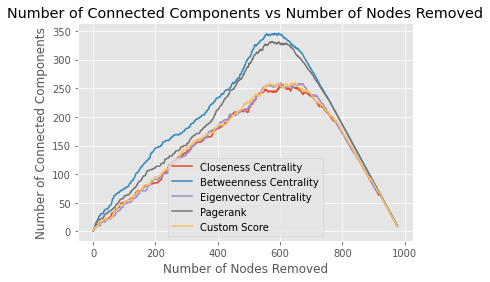

In [146]:
closeness_centrality_score_x, closeness_centrality_score_y = NumberOfComp_vs_NodeRemoved(undirected_Base_Graph, closeness_centrality_score)
betweenness_centrality_score_x, betweenness_centrality_score_y = NumberOfComp_vs_NodeRemoved(undirected_Base_Graph, betweenness_centrality_score)
eigenvector_centrality_score_x, eigenvector_centrality_score_y = NumberOfComp_vs_NodeRemoved(undirected_Base_Graph, eigenvector_centrality_score)
pagerank_score_x, pagerank_score_y = NumberOfComp_vs_NodeRemoved(undirected_Base_Graph, pagerank_score)
new_custom_score_x, new_custom_score_y = NumberOfComp_vs_NodeRemoved(undirected_Base_Graph, new_custom_score)

plt.plot(closeness_centrality_score_x, closeness_centrality_score_y, label="Closeness Centrality")
plt.plot(betweenness_centrality_score_x, betweenness_centrality_score_y, label="Betweenness Centrality")
plt.plot(eigenvector_centrality_score_x, eigenvector_centrality_score_y, label="Eigenvector Centrality")
plt.plot(pagerank_score_x, pagerank_score_y, label="Pagerank")
plt.plot(new_custom_score_x, new_custom_score_y, label="Custom Score")
plt.legend()
plt.xlabel("Number of Nodes Removed")
plt.ylabel("Number of Connected Components")
plt.title("Number of Connected Components vs Number of Nodes Removed")
plt.show()


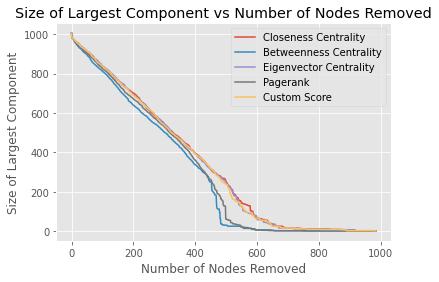

In [147]:
closeness_centrality_score_x, closeness_centrality_score_y = SizeOfLargestComp_vs_NodeRemoved(undirected_Base_Graph, closeness_centrality_score)
betweenness_centrality_score_x, betweenness_centrality_score_y = SizeOfLargestComp_vs_NodeRemoved(undirected_Base_Graph, betweenness_centrality_score)
eigenvector_centrality_score_x, eigenvector_centrality_score_y = SizeOfLargestComp_vs_NodeRemoved(undirected_Base_Graph, eigenvector_centrality_score)
pagerank_score_x, pagerank_score_y = SizeOfLargestComp_vs_NodeRemoved(undirected_Base_Graph, pagerank_score)
new_custom_score_x, new_custom_score_y = SizeOfLargestComp_vs_NodeRemoved(undirected_Base_Graph, new_custom_score)

plt.plot(closeness_centrality_score_x, closeness_centrality_score_y, label="Closeness Centrality")
plt.plot(betweenness_centrality_score_x, betweenness_centrality_score_y, label="Betweenness Centrality")
plt.plot(eigenvector_centrality_score_x, eigenvector_centrality_score_y, label="Eigenvector Centrality")
plt.plot(pagerank_score_x, pagerank_score_y, label="Pagerank")
plt.plot(new_custom_score_x, new_custom_score_y, label="Custom Score")
plt.legend()
plt.xlabel("Number of Nodes Removed")
plt.ylabel("Size of Largest Component")
plt.title("Size of Largest Component vs Number of Nodes Removed")
plt.show()


In [148]:
closeness_centrality_score = closeness_centrality(undirected_Base_Graph)
betweenness_centrality_score = betweenness_centrality(undirected_Base_Graph)
eigenvector_centrality_score = eigenvector_centrality(undirected_Base_Graph)
pagerank_score = pagerank(undirected_Base_Graph)
new_custom_score = score_based_on_centralities(
    closeness_centrality_score,
    betweenness_centrality_score,
    eigenvector_centrality_score,
    pagerank_score,
    [0.0, 0.5, 0.0, 0.5]
)

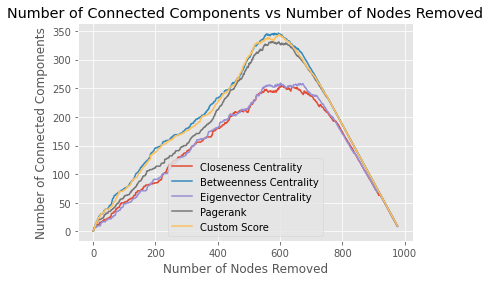

In [149]:
closeness_centrality_score_x, closeness_centrality_score_y = NumberOfComp_vs_NodeRemoved(undirected_Base_Graph, closeness_centrality_score)
betweenness_centrality_score_x, betweenness_centrality_score_y = NumberOfComp_vs_NodeRemoved(undirected_Base_Graph, betweenness_centrality_score)
eigenvector_centrality_score_x, eigenvector_centrality_score_y = NumberOfComp_vs_NodeRemoved(undirected_Base_Graph, eigenvector_centrality_score)
pagerank_score_x, pagerank_score_y = NumberOfComp_vs_NodeRemoved(undirected_Base_Graph, pagerank_score)
new_custom_score_x, new_custom_score_y = NumberOfComp_vs_NodeRemoved(undirected_Base_Graph, new_custom_score)

plt.plot(closeness_centrality_score_x, closeness_centrality_score_y, label="Closeness Centrality")
plt.plot(betweenness_centrality_score_x, betweenness_centrality_score_y, label="Betweenness Centrality")
plt.plot(eigenvector_centrality_score_x, eigenvector_centrality_score_y, label="Eigenvector Centrality")
plt.plot(pagerank_score_x, pagerank_score_y, label="Pagerank")
plt.plot(new_custom_score_x, new_custom_score_y, label="Custom Score")
plt.legend()
plt.xlabel("Number of Nodes Removed")
plt.ylabel("Number of Connected Components")
plt.title("Number of Connected Components vs Number of Nodes Removed")
plt.show()

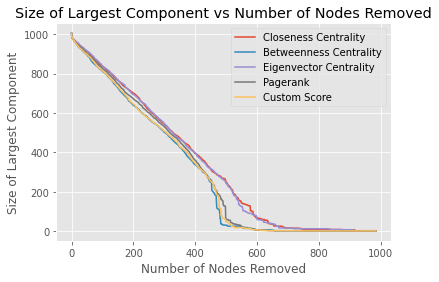

In [150]:
closeness_centrality_score_x, closeness_centrality_score_y = SizeOfLargestComp_vs_NodeRemoved(undirected_Base_Graph, closeness_centrality_score)
betweenness_centrality_score_x, betweenness_centrality_score_y = SizeOfLargestComp_vs_NodeRemoved(undirected_Base_Graph, betweenness_centrality_score)
eigenvector_centrality_score_x, eigenvector_centrality_score_y = SizeOfLargestComp_vs_NodeRemoved(undirected_Base_Graph, eigenvector_centrality_score)
pagerank_score_x, pagerank_score_y = SizeOfLargestComp_vs_NodeRemoved(undirected_Base_Graph, pagerank_score)
new_custom_score_x, new_custom_score_y = SizeOfLargestComp_vs_NodeRemoved(undirected_Base_Graph, new_custom_score)

plt.plot(closeness_centrality_score_x, closeness_centrality_score_y, label="Closeness Centrality")
plt.plot(betweenness_centrality_score_x, betweenness_centrality_score_y, label="Betweenness Centrality")
plt.plot(eigenvector_centrality_score_x, eigenvector_centrality_score_y, label="Eigenvector Centrality")
plt.plot(pagerank_score_x, pagerank_score_y, label="Pagerank")
plt.plot(new_custom_score_x, new_custom_score_y, label="Custom Score")
plt.legend()
plt.xlabel("Number of Nodes Removed")
plt.ylabel("Size of Largest Component")
plt.title("Size of Largest Component vs Number of Nodes Removed")
plt.show()


In [53]:
# def plot_SizeOfLargestComp_vs_PageRankNodeRemoved(g1, nodes=986):
#     graph1 = g1.copy()
#     number_of_components = [[]]
#     number_of_components.append([-1, nx.number_connected_components(graph1)])
#     # while(graph1.number_of_nodes() > nodes - 100):
#     y = []
#     x = []
#     i = 0
#     y.append(nodes)
#     i += 1
#     x.append(i)
#     map_score = nx.pagerank(graph1)
#     custom_score = np.array([[key, value] for key, value in map_score.items()])
#     # print(custom_score)
#     custom_score = custom_score[custom_score[:, 1].argsort()]
#     Nnodes = graph1.number_of_nodes()
#     for _ in range(Nnodes - 1):
#         print("Number of Nodes removed: ", nodes - graph1.number_of_nodes(), end=" ,")
#         print(
#             "Size of Largest Component: ",
#             len(max(nx.connected_components(graph1), key=len)),
#         )
#         node_to_remove = int(custom_score[-i][0])
#         graph1.remove_node(node_to_remove)
#         y.append(len(max(nx.connected_components(graph1), key=len)))
#         i += 1
#         x.append(i)
#         number_of_components.append(
#             [node_to_remove, len(max(nx.connected_components(graph1), key=len))]
#         )

#     # y = np.array(number_of_components)[:,1]
#     # x = np.array([i for i in range(len(number_of_components))])
#     plt.xlabel("Number of Nodes Removed")
#     plt.ylabel("Size of Largest Component")
#     plt.plot(x, y)
#     return x, y

In [102]:
# num_Nodes, size_Comp = plot_SizeOfLargestComp_vs_PageRankNodeRemoved(
#     undirected_Base_Graph
# )